In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)


Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [47]:
import plotly
import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='along528', api_key='hujfuqivck')


In [4]:
dbname = 'combined_profiling'
username = 'along528'
pswd = 'password'
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

In [5]:
df_all = pd.read_sql('SELECT * FROM traffic_joined_with_features',con)
df_all

,index,surveyid,agency,city,state,zipcode,stops_total,searches_total,hits_total,stops_white,...,impdrugtask,impgangtask,imphumntask,impterrtask,impcell,csllea04_id,population,lpdsampgrp,finalwt_page1,finalwt_page2on
0,0,167,Bridgeport Police Department,Bridgeport,CT,06604,6553,700,69,3881,...,0,0,0,0,3,10032119,137655,100,1.049730,0.000000
1,1,1212,New London Police Department,New London,CT,06320,2188,197,68,1755,...,0,0,0,0,9,10032166,25890,1,2.207370,2.217590
2,2,1222,Westport Police Department,Westport,CT,06880,9648,336,128,8463,...,0,0,0,0,9,10032208,26704,1,2.207370,2.217590
3,3,184,Waterbury Police Department,Waterbury,CT,06702,2673,676,131,1832,...,0,0,0,0,3,10032202,107241,100,1.049730,1.059140
4,4,175,Hartford Police Department,Hartford,CT,06120,10980,182,64,6526,...,0,0,0,0,3,10032148,124558,100,1.049730,1.059140
5,5,1223,Wethersfield Police Department,Wethersfield,CT,06109,7707,467,186,6117,...,0,0,0,0,11,10032209,25977,2,3.490480,3.539640
6,6,1214,Plainfield Police Department,Plainfield,CT,06374,1764,34,10,1708,...,0,0,0,0,14,10032177,15538,4,7.480850,7.545060
7,7,170,Danbury Police Department,Danbury,CT,06810,7757,497,34,6992,...,0,0,0,0,5,10032128,79893,100,1.049730,1.059140
8,8,174,Hamden Police Department,Hamden,CT,06518,7772,149,20,4796,...,0,0,0,0,5,10032147,57982,100,1.049730,1.059140
9,9,179,New Britain Police Department,New Britain,CT,06051,10035,452,231,8020,...,0,0,0,0,5,10032161,70630,100,1.049730,1.059140


In [6]:
ratio_keys = []
#num,denom
ratio_keys.append(['searches','stops'])
ratio_keys.append(['hits','searches'])
ratio_keys.append(['hits','stops'])
ratios = {}
labels = {}
for state in ['all','CT','IL','NC']:
    ratios[state] = {}
    if state!='all':
        labels[state] = df_all[df_all['state']==state]['agency'].values.tolist()
    else:
        labels[state] = df_all['agency'].values.tolist()

    for race in ['black','white']:
 
        for num_key,denom_key in ratio_keys:
            if state == 'all':
                num = df_all[num_key+'_'+race]
                denom = df_all[denom_key+'_'+race]
                ratios[state]["%s_over_%s_%s" %(num_key,denom_key,race)] = num.div(denom).fillna(0)
            else:
                num = df_all[df_all['state']==state][num_key+'_'+race]
                denom = df_all[df_all['state']==state][denom_key+'_'+race]
                ratios[state]["%s_over_%s_%s" %(num_key,denom_key,race)] = num.div(denom).fillna(0)


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8]


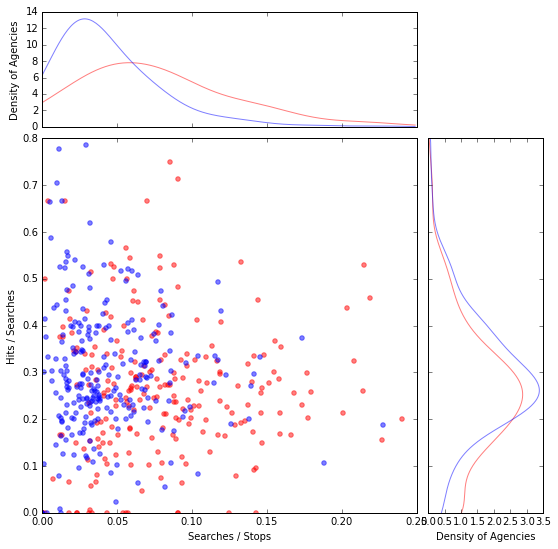

In [72]:
import numpy
from scipy import stats
# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

alpha = .5

state = 'all'
hits = {}
hits['black'] = ratios[state]['hits_over_searches_black'].values
hits['white'] = ratios[state]['hits_over_searches_white'].values
searches = {}
searches['black'] = ratios[state]['searches_over_stops_black'].values
searches['white'] = ratios[state]['searches_over_stops_white'].values
axScatter.set_ylabel('Hits / Searches')
axScatter.set_xlabel('Searches / Stops')
black = axScatter.scatter(searches['black'],hits['black'],color='r',alpha=alpha,label='Black Drivers')
white = axScatter.scatter(searches['white'],hits['white'],color='b',alpha=alpha,label='White Drivers')

#plt.legend([black,white])




# now determine nice limits by hand:
ylim = [0,.8]
xlim = [0,.25]
axScatter.set_xlim(xlim)
axScatter.set_ylim(ylim)
xbinwidth = 0.025
ybinwidth = .1
binsx = np.arange(xlim[0], xlim[1] + xbinwidth, xbinwidth)
binsy = np.arange(ylim[0], ylim[1] + ybinwidth, ybinwidth)
print binsy
density_hits = {}
density_hits['black'] = stats.kde.gaussian_kde(hits['black'])
density_hits['white'] = stats.kde.gaussian_kde(hits['white'])
density_searches = {}
density_searches['black'] = stats.kde.gaussian_kde(searches['black'])
density_searches['white'] = stats.kde.gaussian_kde(searches['white'])

x = numpy.arange(xlim[0],xlim[1], .001)

y = numpy.arange(ylim[0],ylim[1], .001)
axHisty.plot(density_hits['black'](y),y,color='r',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
axHisty.plot(density_hits['white'](y),y,color='b',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
axHistx.plot(x,density_searches['black'](x),color='r',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
axHistx.plot(x,density_searches['white'](x),color='b',alpha=alpha) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')

#axHisty.hist(hits['black'], bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
#axHisty.hist(hits['white'], bins=binsy,facecolor='b',alpha=alpha,edgecolor='b',orientation='horizontal',histtype='step')
#axHistx.hist(searches['black'], bins=binsx,facecolor='r',alpha=alpha,edgecolor='r',histtype='step')
#axHistx.hist(searches['white'], bins=binsx,facecolor='b',alpha=alpha,edgecolor='b',histtype='step')

tag = ''
if state!='all':
    tag = ' in '+state
    
axHistx.set_xlim(axScatter.get_xlim())
#axHistx.set_ylim([0,40])
axHistx.set_ylabel('Density of Agencies'+tag)

axHisty.set_ylim(axScatter.get_ylim())
#axHisty.set_xlim([0,50])
#axHisty.set_xlabel('Agencies in NC')
axHisty.set_xlabel('Density of Agencies'+tag)
plt.savefig('images/hits_vs_searches_scatter_density.png')
plt.show()

In [38]:
from scipy.stats import ttest_ind
print 'searches/stops p-value',ttest_ind(searches['black'],searches['white']).pvalue
print 'hits/stops p-value',ttest_ind(hits['black'],hits['white']).pvalue
print 'searches/stops mean black =',searches['black'].mean(),', mean white =',searches['white'].mean()
print 'hits/searches mean black =',hits['black'].mean(),', mean white =',hits['white'].mean()

searches/stops p-value 1.68621545345e-10
hits/stops p-value 0.00184442234306
searches/stops mean black = 0.0819417099559 , mean white = 0.0472999313918
hits/searches mean black = 0.253517985445 , mean white = 0.295534436947


In [69]:
spines = ['bottom','top','left','right']

def get_scatter(state,ratios):
    
    # the random data
    x = np.random.randn(1000)
    y = np.random.randn(1000)

    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    fig = plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    for spine in spines:
        axScatter.spines[spine].set_color('white')

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    color_black_drivers = '#dd3439'
    color_white_drivers = '#007dff'
    alpha = 1.
    hits = {}
    hits['black'] = ratios[state]['hits_over_searches_black'].values
    hits['white'] = ratios[state]['hits_over_searches_white'].values
    searches = {}
    searches['black'] = ratios[state]['searches_over_stops_black'].values
    searches['white'] = ratios[state]['searches_over_stops_white'].values
    axScatter.set_ylabel('Hits / Searches',color='white')
    axScatter.set_xlabel('Searches / Stops',color='white')
    black = axScatter.scatter(searches['black'],hits['black'],color=color_black_drivers,alpha=alpha,label='Black Drivers')
    white = axScatter.scatter(searches['white'],hits['white'],color=color_white_drivers,alpha=alpha,label='White Drivers')
    axScatter.tick_params(axis='x', colors='white')
    axScatter.tick_params(axis='y', colors='white')

    #plt.legend([black,white])




    # now determine nice limits by hand:
    ylim = [0,.8]
    xlim = [0,.25]
    axScatter.set_xlim(xlim)
    axScatter.set_ylim(ylim)
    xbinwidth = 0.025
    ybinwidth = .1
    binsx = np.arange(xlim[0], xlim[1] + xbinwidth, xbinwidth)
    binsy = np.arange(ylim[0], ylim[1] + ybinwidth, ybinwidth)
    print binsy
    linewidth = 2
    density_hits = {}
    density_hits['black'] = stats.kde.gaussian_kde(hits['black'])
    density_hits['white'] = stats.kde.gaussian_kde(hits['white'])
    density_searches = {}
    density_searches['black'] = stats.kde.gaussian_kde(searches['black'])
    density_searches['white'] = stats.kde.gaussian_kde(searches['white'])

    x = np.arange(xlim[0],xlim[1], .001)
    

    y = np.arange(ylim[0],ylim[1], .001)
    axHisty.plot(density_hits['black'](y),y,color=color_black_drivers,alpha=alpha,linewidth=linewidth) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
    axHisty.plot(density_hits['white'](y),y,color=color_white_drivers,alpha=alpha,linewidth=linewidth) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
    axHistx.plot(x,density_searches['black'](x),color=color_black_drivers,alpha=alpha,linewidth=linewidth) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
    axHistx.plot(x,density_searches['white'](x),color=color_white_drivers,alpha=alpha,linewidth=linewidth) #,orientation='horizontal') # bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')

    #axHisty.hist(hits['black'], bins=binsy,facecolor='r',alpha=alpha,edgecolor='r',orientation='horizontal',histtype='step')
    #axHisty.hist(hits['white'], bins=binsy,facecolor='b',alpha=alpha,edgecolor='b',orientation='horizontal',histtype='step')
    #axHistx.hist(searches['black'], bins=binsx,facecolor='r',alpha=alpha,edgecolor='r',histtype='step')
    #axHistx.hist(searches['white'], bins=binsx,facecolor='b',alpha=alpha,edgecolor='b',histtype='step')

    tag = ''
    if state!='all':
        tag = ' in '+state

    axHistx.set_xlim(axScatter.get_xlim())
    #axHistx.set_ylim([0,40])
    axHistx.set_ylabel('Density of Agencies'+tag,color='white')

    axHisty.set_ylim(axScatter.get_ylim())
    #axHisty.set_xlim([0,50])
    #axHisty.set_xlabel('Agencies in NC')
    axHisty.set_xlabel('Density of Agencies'+tag,color='white')
    
    
    axHistx.tick_params(axis='x', colors='white')
    axHistx.tick_params(axis='y', colors='white')


    
    axHisty.tick_params(axis='x', colors='white')
    axHisty.tick_params(axis='y', colors='white')

    for spine in spines:
        axHistx.spines[spine].set_color('white')
        axHisty.spines[spine].set_color('white')
    plt.savefig('images/scatter_'+state+'.png',transparent=True)


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8]


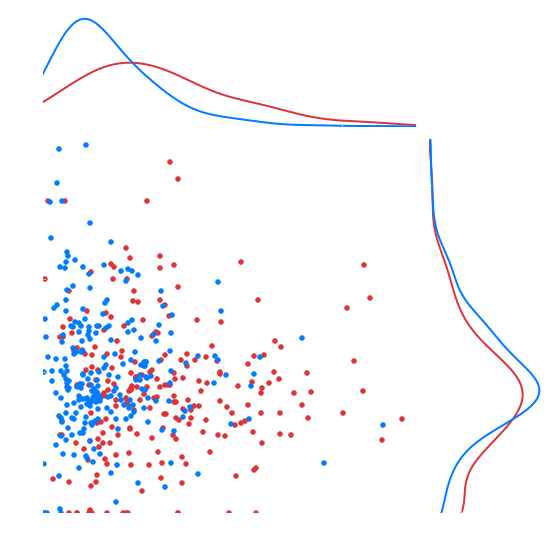

In [70]:
get_scatter('all',ratios)


In [73]:
plot_url = py.plot_mpl(fig)
#plotly_fig = tls.mpl_to_plotly(fig)


In [49]:
black = go.Scatter(
    x = searches['black'],
    y = hits['black'],
    mode = 'markers',
    text = labels['all'],
    name = 'Black Drivers'
)
white = go.Scatter(
    x = searches['white'],
    y = hits['white'],
    mode = 'markers',
    text = labels['all'],
    name = 'White Drivers'
)
ratio = go.Scatter(
    x = searches['black']/searches['white'],
    y = hits['black']/hits['white'],
    mode = 'markers',
    text = labels['all'],
    name = 'White Drivers'
)

layout = go.Layout(hovermode='closest',
                  #paper_bgcolor='rgba(244,244,248,1)',
                  #plot_bgcolor='rgba(244,244,248,1)')
                   paper_bgcolor='rgba(0,0,0,1)',
                  plot_bgcolor='rgba(0,0,0,1)',
                   xaxis = dict(
                        title='Searches / Stops',
                        titlefont=dict(
                            family='Courier New, monospace',
                            size=18,
                            color='#ffffff'))
                  ,
                  yaxis = dict(
                        title='Hits / Searches',
                        titlefont=dict(
                            family='Lato',
                            size=18,
                            color='#ffffff'))
                  )
                  #textcolor = '#ffffff')
data = [ratio]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)